# Multi-Linear Regression

Multiple linear regression (MLR), also simply just knonwn as the multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. MLR is to model the linear relationship between the explanatory (independent) variables and response (dependent) variable.

- We will predict salary from all the variables in the training dataset. <br> 
- We are going to use a simple supervised learning technique: linear regression. 

## 1. Importing

In [1]:
# importing libraries 

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
import plotly.graph_objects as go
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot


C:\Users\Mc Camel RT .LAPTOP-6N3UDB08\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [2]:
# Reading data into a dataframe

salaries = pd.read_csv('data/salary.csv')

# printing the head of the dataset
salaries.head(1)

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0


<h1><center>Type of data</center></h1> 

| Continuous | Categorical | Binary |
| --- | --- | --- |
| Salary | position | degree |
| exprior | field | otherqual |
| Yearsworked | - | male |
| market | - | - |
| yearsranked | - | -|
| yearsabs | - | - |

<h1><center>Feature description</center></h1> 

| Feature | Description |
| --- | --- |
| exprior | Years of experience prior to working in this field |
| Yearsworked | Years worked in this field |
| yearsrank | Years worked at current rank |
| market | Market value (1 = salary at market value for position, <br> <1 salary lower than market value for position,<br> >1 salary higher than market value for position) |
| degree | Has degree (0 = no 1= yes) |
| otherqual | Has other post-secondary qualification (0 = no, 1=yes) |
| position | Position (1 = Junior Employee 2=Manager 3= Executive) |
| male | 0 = no 1 1=yes |
| Field | Field of work (1 = Engineering 2=Finance 3=Human Resource 4=Marketing) |
| yearsabs |Years absent from work (e.g. due to illness / child rearing / personal reasons)|

<h1><center>Response description</center></h1> 

| Response | Description |
| --- | --- |
| <font color='black'> salary </font>| <font color='black'>  Annual salary in dollars </font> | 

## 2. Cleaning data
Data cleaning is the process of detecting and correcting corrupt or inaccurate data from a dataset, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.
### 2.1 Examining missing values

In [3]:
#checking for missing values
salaries.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [4]:
#replacing the missing value with the mean
salaries['salary']= salaries.fillna(salaries['salary'].mean())

##### What we did with the missing values in the data

- We <b>filled</b> the missing value that appeared in the <b>salary</b> column with the <b>mean</b> of that column.

### 2.2 Examing duplicates within the dataset 

In [5]:
#Dropping duplicates
salaries.drop_duplicates(inplace = True)

##### Dealing with duplicates within the dataset

We dropped any duplicates that may exist within the dataset

### 2.3 Examining outliers within the dataset
In statistics, an outlier is an observation point that is distant from other observations.

In [6]:
# Check for extreme values

q3,q1 = np.percentile(salaries, [75,25])
IQR = q3-q1

In [7]:
# Removing the outliers
new_salaries = salaries[~((salaries <(q1-1.5*IQR))| (salaries > (q3+1.5*IQR))).any(axis=1)]

##### Outliers

Using the box plot method have observed <b> two outliers</b> for the salary values, and <b>none</b> for the yearsworked values. 
How we intend on dealing with the outliers is to <b>remove </b> them, so that the model that we will build will not be affected.

### 2.4 Spliting data

In [8]:
#one hot encoding

field = pd.get_dummies(salaries['Field'])
position = pd.get_dummies(salaries['position'])

new_field = field.rename(columns={1:'Engeneering_field',2:'Finance_field',3:'HR_field',4:'Marketing_field'})
new_position = position.rename(columns={1:'Junior_Employee_position', 2: 'Manager_position', 3:'Executive_position'})

salaries = pd.concat([salaries, new_field, new_position] ,axis=1)
salaries.drop(['HR_field','Manager_position'], axis=1,inplace=True)
# salaries.drop(['position','Field'], axis=1,inplace=True)

salaries.head(1)

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Engeneering_field,Finance_field,Marketing_field,Junior_Employee_position,Executive_position
0,53000.0,0,0,0,1.17,1,0,1,1,3,0,0,0,0,1,0


In [9]:
#Split our data
x = salaries[['exprior','yearsworked','yearsrank','market','degree','otherqual','Junior_Employee_position', 'Executive_position', 'male','Engeneering_field','Finance_field','Marketing_field','yearsabs']]
y = salaries['salary']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
# y_train = pd.DataFrame(y_train)
combined = pd.concat([X_train, y_train], axis=1)
X_train.head(1)

,exprior,yearsworked,yearsrank,market,degree,otherqual,Junior_Employee_position,Executive_position,male,Engeneering_field,Finance_field,Marketing_field,yearsabs
297,0,23,10,1.0,1,0,0,1,1,0,0,1,1


## 3. Exploratory data analysis (EDA)

### 3.1 Multi-variate graphs

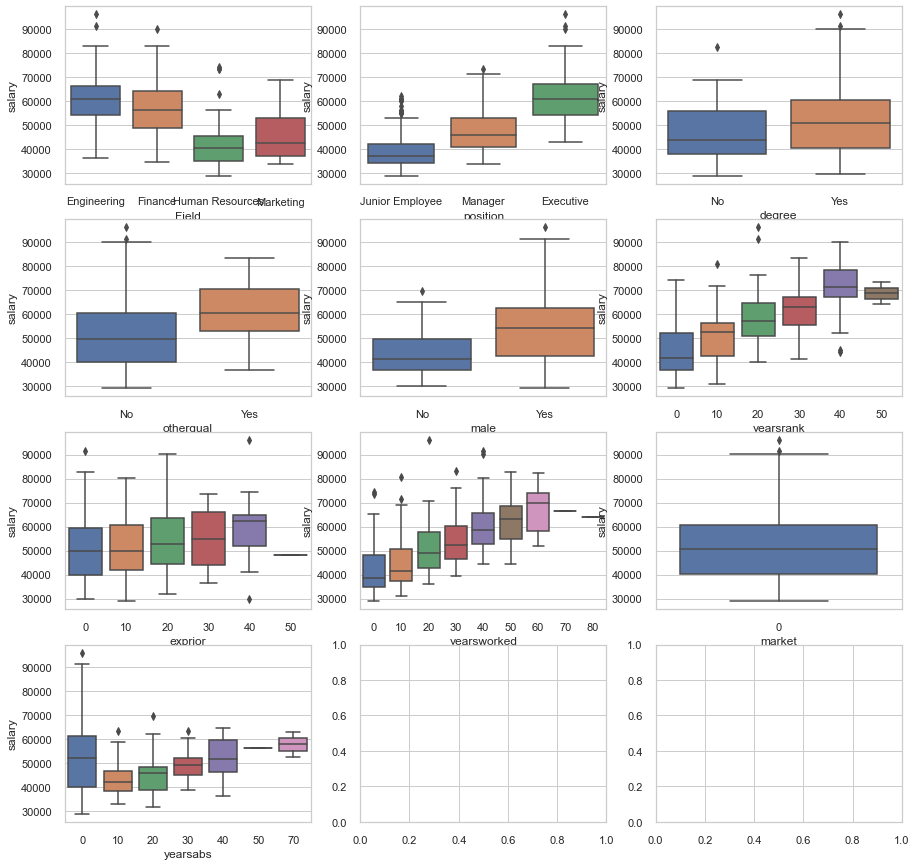

In [24]:
# X_train['exprior'] = X_train['exprior'].apply(lambda x : int(x/5)* 10)
# X_train['yearsrank'] = X_train['yearsrank'].apply(lambda x : int(x/5)* 10)
# X_train['yearsworked'] = X_train['yearsworked'].apply(lambda x : int(x/5)* 10)
# X_train['market'] = X_train['market'].apply(lambda x : int(x/5)* 10)
# X_train['yearsabs'] = X_train['yearsabs'].apply(lambda x : int(x/15)* 10)


sns.set()
sns.set(style="whitegrid")
fig, axes = plt.subplots(4,3, figsize=(15, 15))
lx = sns.boxplot(salaries.Field,combined.salary, ax=axes[0,0], data = salaries)
mx = sns.boxplot(salaries.position,combined.salary, ax=axes[0,1], data = salaries)
nx = sns.boxplot(X_train.degree,combined.salary, ax=axes[0,2], data = combined)
ox = sns.boxplot(X_train.otherqual,combined.salary, ax=axes[1,0], data = combined)
px = sns.boxplot(X_train.male,combined.salary, ax=axes[1,1], data = combined)
qx = sns.boxplot(X_train.yearsrank,combined.salary, ax=axes[1,2], data = combined)
rx = sns.boxplot(X_train.exprior,combined.salary, ax=axes[2,0], data = combined)
sx = sns.boxplot(X_train.yearsworked,combined.salary, ax=axes[2,1], data = combined)
tx = sns.boxplot(X_train.market,combined.salary, ax=axes[2,2], data = combined)
ax = sns.boxplot(X_train.yearsabs,combined.salary, ax=axes[3,0], data = combined)

lx.set_xticklabels(['Engineering', 'Finance','Human Resources','Marketing'])
mx.set_xticklabels(['Junior Employee', 'Manager','Executive'])
nx.set_xticklabels(['No', 'Yes'])
ox.set_xticklabels(['No', 'Yes'])
px.set_xticklabels(['No', 'Yes'])


plt.show()

## 4. Modelling  

<b>Hypothesis testing: </b> <br>
H0: Does not have signficant relationship <br>
Ha: Has significant relationship

### 4.1 Fitting linear regression

In [11]:
# Fit regression model 
results = smf.ols('salary ~ exprior+yearsworked+yearsrank+market+degree+otherqual+Junior_Employee_position+Executive_position+male+Engeneering_field+Finance_field+Marketing_field+yearsabs', data=combined).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     136.3
Date:                Fri, 17 Jul 2020   Prob (F-statistic):          2.21e-137
Time:                        08:38:41   Log-Likelihood:                -4120.1
No. Observations:                 411   AIC:                             8268.
Df Residuals:                     397   BIC:                             8324.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## 5 Linear Regression assumptions

### 5.1 Linear relationship

There needs to exist a relationship between the feature values and the response variable and it has to be linear

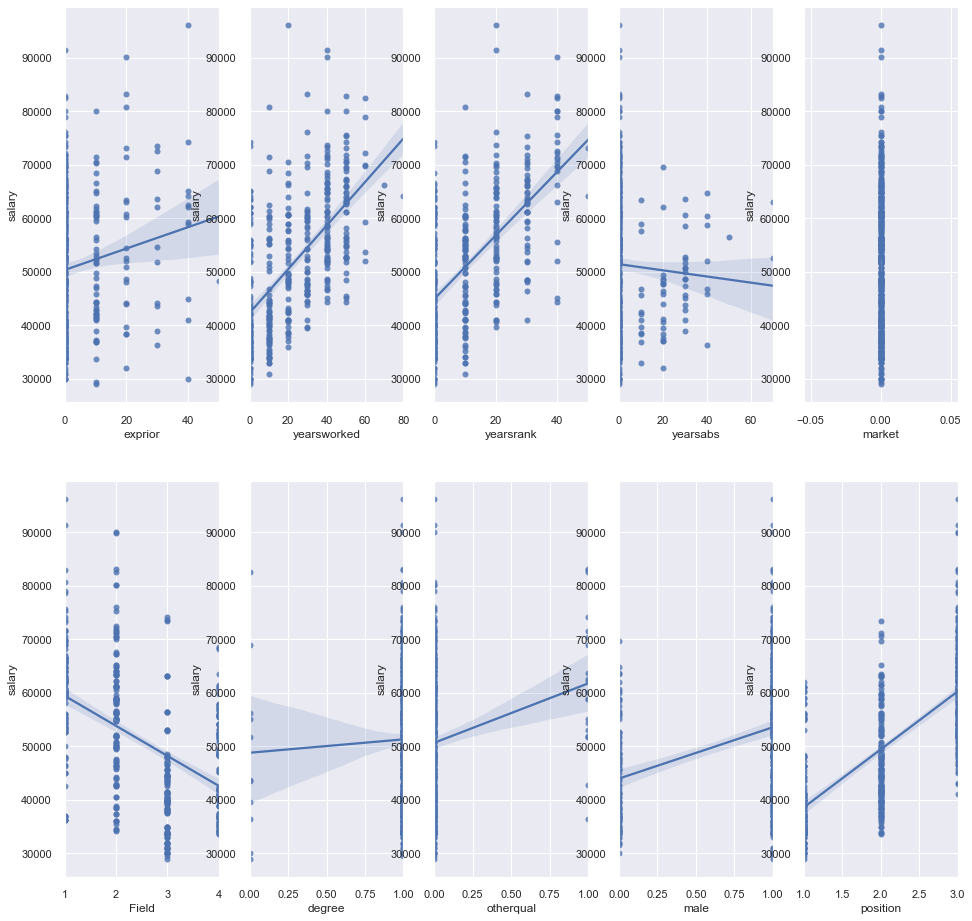

In [12]:
#scatter plot

sns.set()
# sns.set(style = 'whitegrid')
fig, axes = plt.subplots(2,5, figsize=(16,16))

sns.regplot(x=X_train['exprior'], y=y_train, ax= axes[0,0])
sns.regplot(x=X_train['yearsworked'], y=y_train,ax= axes[0,1]);
sns.regplot(x=X_train['yearsrank'], y=y_train, ax= axes[0,2])
sns.regplot(x=X_train['yearsabs'], y=y_train,ax= axes[0,3]);
sns.regplot(x=X_train['market'], y=y_train,ax= axes[0,4]);
sns.regplot(x=salaries['Field'], y=salaries['salary'],ax= axes[1,0]);
sns.regplot(x=X_train['degree'], y=y_train, ax= axes[1,1])
sns.regplot(x=X_train['otherqual'], y=y_train,ax= axes[1,2]);
sns.regplot(x=X_train['male'], y=y_train, ax= axes[1,3]);
sns.regplot(x=salaries['position'], y=salaries['salary'], ax= axes[1,4]);


### 5.2 Multivariate normality

All the variables present in the dataset are to be normal

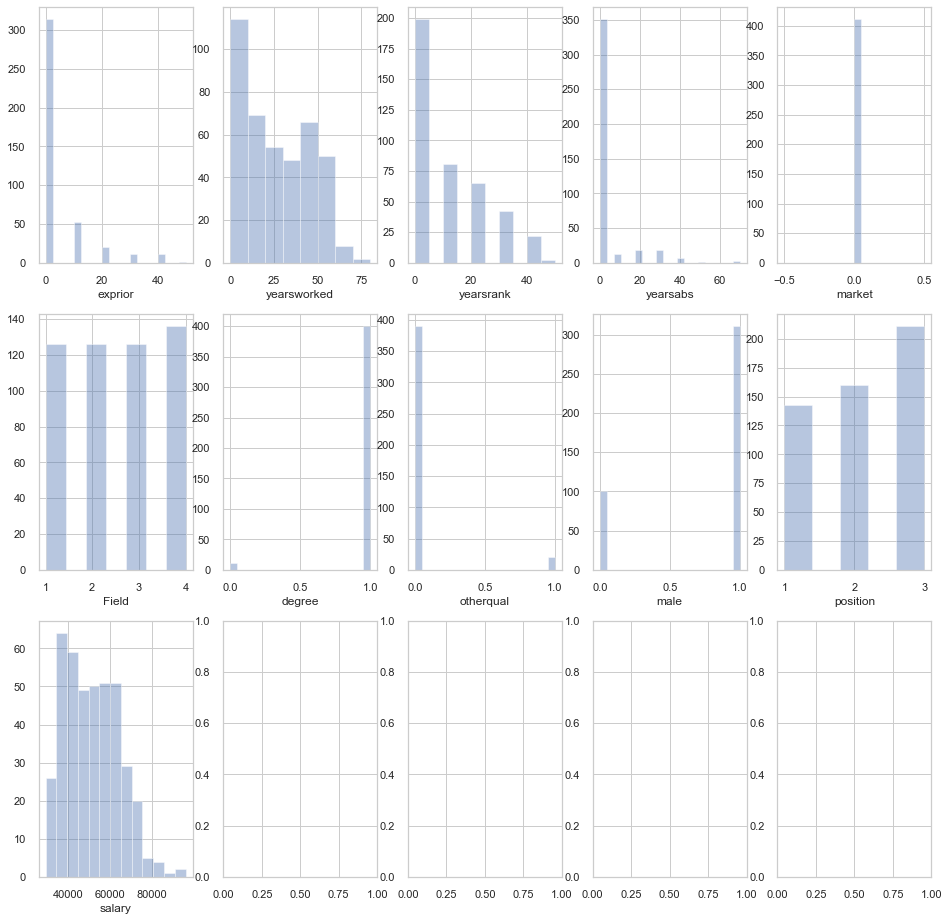

In [47]:
#histogram plot

fig, axes = plt.subplots(3,5, figsize=(16,16))

sns.distplot(X_train['exprior'],kde= False ,ax= axes[0,0])
sns.distplot(X_train['yearsworked'],kde= False ,ax= axes[0,1]);
sns.distplot(X_train['yearsrank'],kde= False ,ax= axes[0,2])
sns.distplot(X_train['yearsabs'],kde= False ,ax= axes[0,3]);
sns.distplot(X_train['market'],kde= False, ax= axes[0,4]);
sns.distplot(salaries['Field'],kde= False ,ax= axes[1,0]);
sns.distplot(X_train['degree'],kde= False ,ax= axes[1,1])
sns.distplot(X_train['otherqual'],kde= False ,ax= axes[1,2]);
sns.distplot(X_train['male'],kde= False ,ax= axes[1,3])
sns.distplot(salaries['position'],kde= False ,ax= axes[1,4]);
sns.distplot(combined['salary'],kde= False ,ax= axes[2,0]);


### 5.3 No or little multicollinearity

The occurance of high correlation between independent variables

In [14]:
# 3. correlation matrix

corr = salaries.corr()
corr.style.background_gradient(cmap='coolwarm')

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Engeneering_field,Finance_field,Marketing_field,Junior_Employee_position,Executive_position
salary,1.000000,0.119946,0.623135,0.610580,0.407208,0.044552,0.167129,0.701354,0.361447,-0.498485,-0.069622,0.425924,0.231553,-0.216296,-0.539288,0.676806
exprior,0.119946,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.116596,0.046558,-0.048315,0.132380,0.054154,0.002187,-0.015614,-0.087460,0.114514
yearsworked,0.623135,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,-0.261379,0.055468,0.216959,0.150811,-0.097175,-0.637673,0.662764
yearsrank,0.610580,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,-0.263953,0.035632,0.197874,0.169645,-0.122602,-0.400728,0.443050
market,0.407208,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.013358,0.181201,-0.223827,-0.167068,0.198393,0.120506,-0.067055,0.035243,0.009858
degree,0.044552,-0.049373,0.028421,0.006516,0.036408,1.000000,-0.214717,0.043680,0.061611,-0.098424,0.029311,0.083956,0.034750,-0.053679,-0.023434,0.051399
otherqual,0.167129,0.264804,-0.040490,0.007036,0.021692,-0.214717,1.000000,0.160311,0.015833,-0.076623,-0.017639,0.029791,0.095418,-0.044491,-0.113371,0.163714
position,0.701354,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,0.318129,-0.288812,0.029751,0.261283,0.139835,-0.091475,-0.858046,0.883815
male,0.361447,0.046558,0.278963,0.237787,0.181201,0.061611,0.015833,0.318129,1.000000,-0.128874,-0.622179,0.150364,0.024864,-0.011548,-0.244853,0.306780
Field,-0.498485,-0.048315,-0.261379,-0.263953,-0.223827,-0.098424,-0.076623,-0.288812,-0.128874,1.000000,-0.000127,-0.773688,-0.267739,0.783284,0.201700,-0.297263


### 5.4 No auto-correlation

Occurs when residuals are dependent of each other

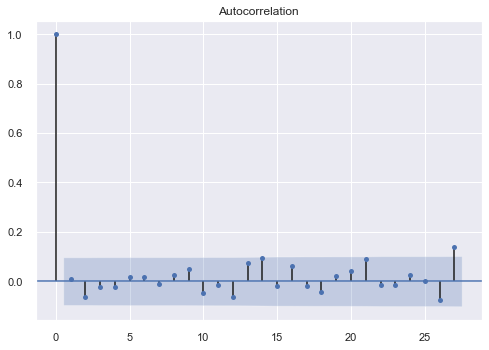

In [15]:
# ACF graph

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y_train)
plt.show()

### 5.5 Homoscedasticity

Constant variance across all independent variables

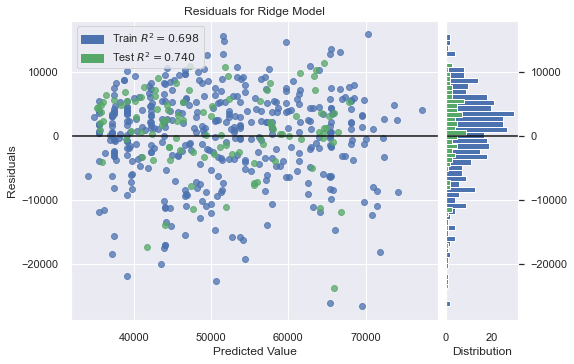

In [16]:
# scatter plot

regression = LinearRegression().fit(X_train, y_train)
model = Ridge()
visualizer = ResidualsPlot(model)

# visualizer = ResidualsPlot(regression)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show();

### 3.4 RSME

In [17]:
# RSME for training dataset
train = results.predict(X_train)

m_s_e = sqrt(mse(y_train, train))
m_s_e

29192.617188358512

In [18]:
# RSME for test dataset
test = results.predict(X_test)

msse = sqrt(mse(y_test, test))
msse

5355.286467618474

##### What is the difference in the Root Mean Square Error (RMSE) between the training and test sets? Is there any evidence of overfitting?

Our model performs better on the train dataset than it does on the test set. With this we can now conclude that the model is overfitted. We say this because our model shows low bias but high variance. To better train our model we need to identify relevant variables and terms that you are likely to influence our outcome that we hoping for

RMSE_train is bigger than  RMSE_test by slight margin therefore there is overfitting on our model.